# Analysing the scRNA-seq of naive, primed, D30 TSCs and EXMCs

In [1]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

Libraries

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(hdf5r))
set.seed(1234)
library(viridis)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Warning message:
“package ‘hdf5r’ was built under R version 4.1.1”
Loading required package: viridisLite



In [3]:
suppressMessages(library(Matrix))

In [4]:
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Brussels’ (or equivalent)”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [5]:
library(tibble)

In [6]:
library(viridis)

In [7]:
library(EnhancedVolcano)

Warning message:
“package ‘EnhancedVolcano’ was built under R version 4.1.1”
Loading required package: ggrepel

Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2



In [8]:
library(ggrepel)

In [9]:
so_norm<- readRDS( "so_naive_primed_TSC_VP.rds")

In [10]:
gene_list <-  c( "POU5F1","SOX2", "NANOG", #core
               "OTX2", "ZIC2", "CD24","DUSP6", "TCF4", #primed
                "KLF17", "KLF4", "SUSD2", "DNMT3L","DPPA5", "TFCP2L1",   #naive
               "GATA2","GATA3", "ITGA6", "TP63", "KRT7", "KRT18", "HAND1","NR2F2",#trophectoderm
             "LUM", "NID2", "FOXF1", "HAND1", "VIM", "POSTN","ANXA1", "PITX1", # EXM
                "SOX17", "GATA4", "GATA6","FOXA2", "PDGFRA", "CDH2",#prE
                "HLA-G", "MMP2",  #EVT
                "CGA", "CGB3", "SDC1", "CK7", #ST 
                "WNT6", "GABRP", "ISL1", "HEY1", "HAND1", "CDH10","CTSV","TPM1", #Amnion  
                "MIXL1", "MESP1", "EPHA4", "ZIC3", "GSC", "TBXT", "FOXF1", "HAND1", "CDX1", "CDX2", "CDX4","EOMES" #Mesoderm
            )

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: CK7”
Warning message in FeaturePlot(cols = c("grey", (RColorBrewer::brewer.pal(9, "Reds"))), :
“All cells have the same value (0) of TBXT.”


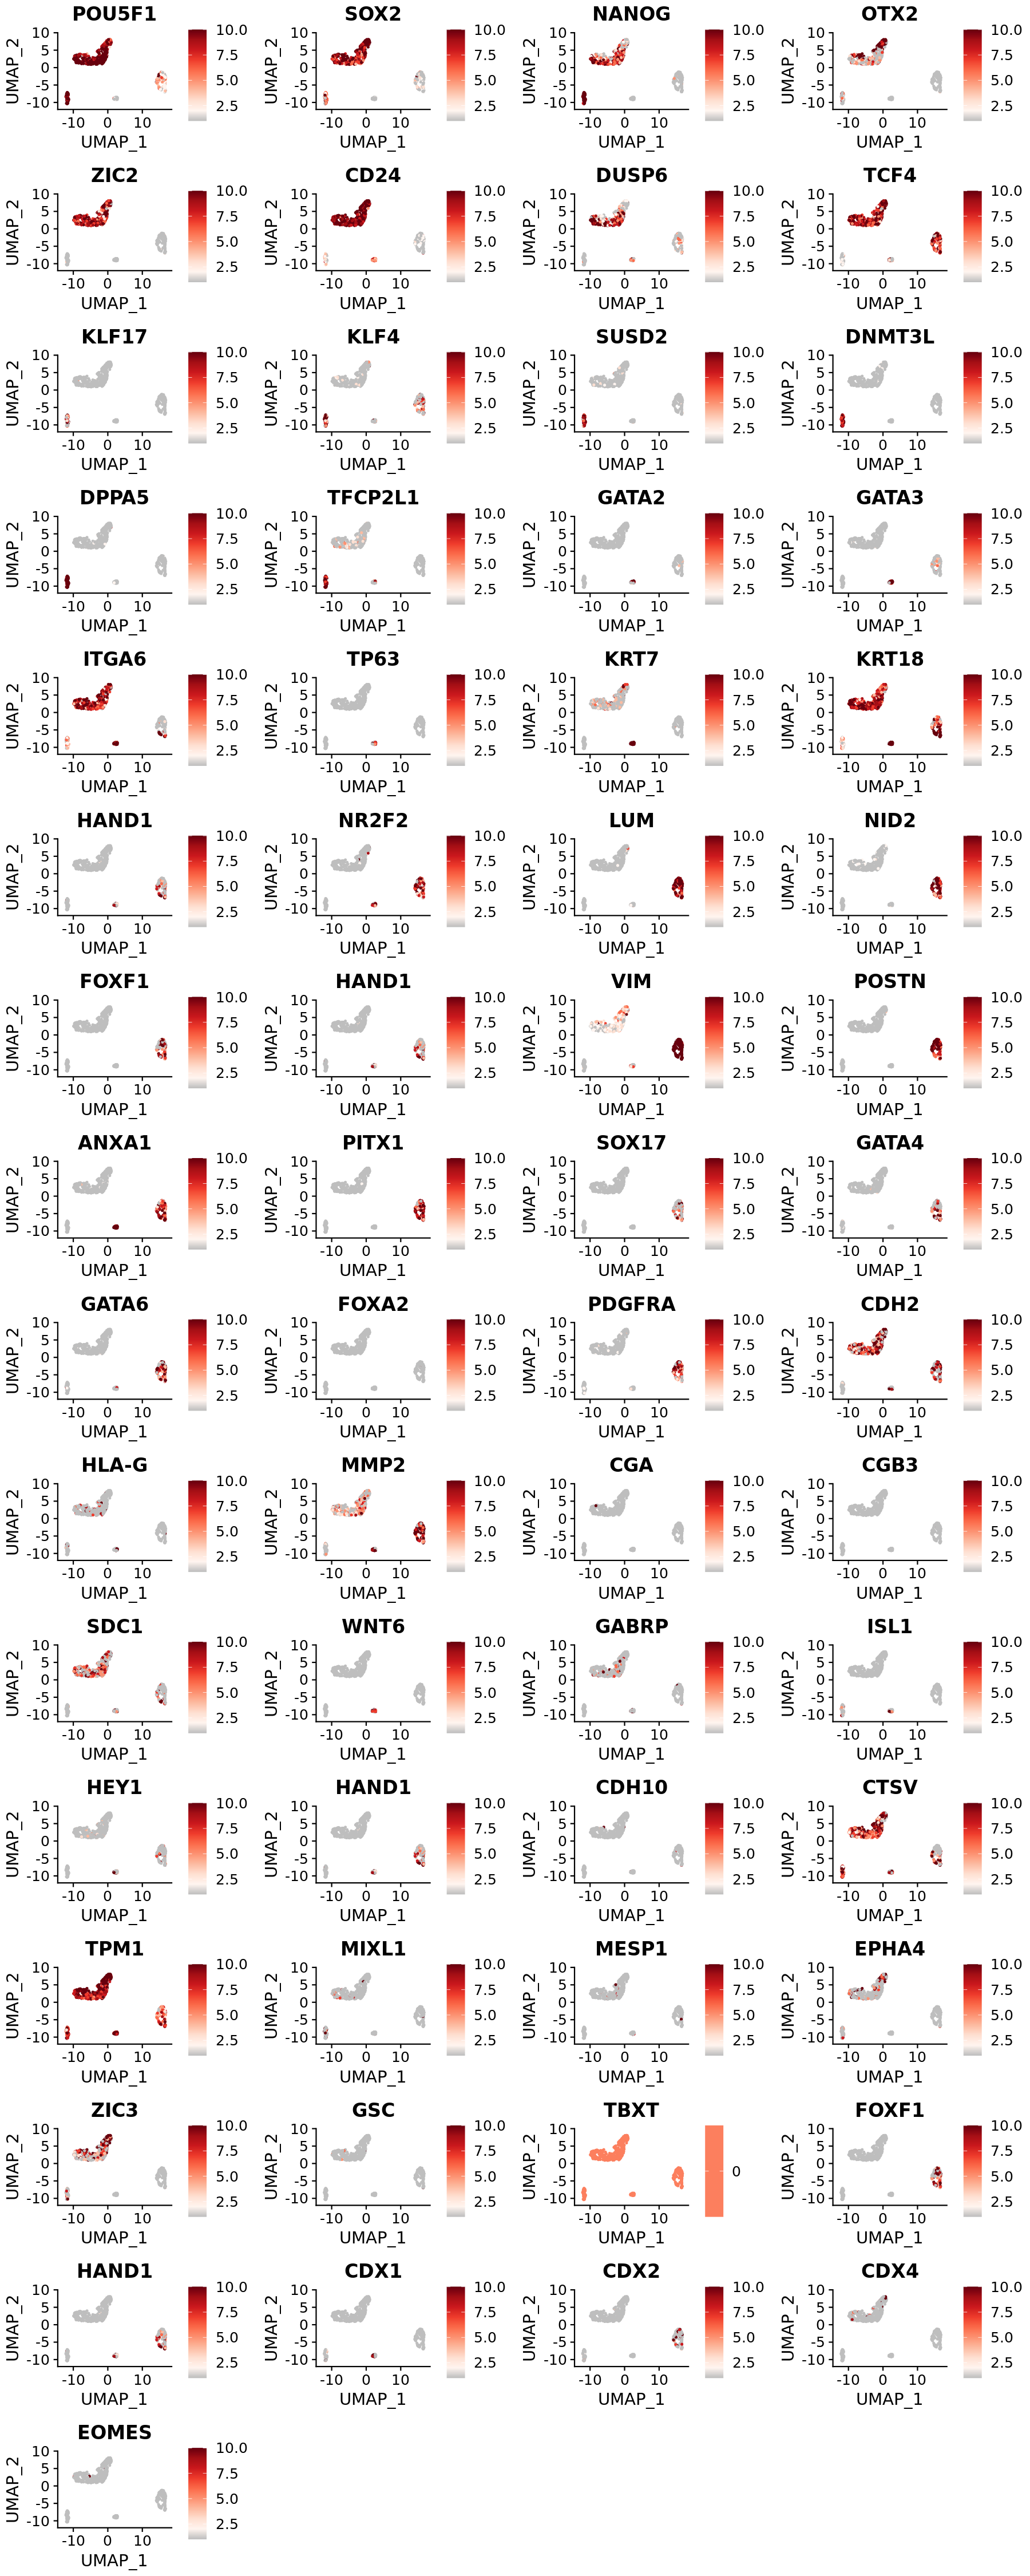

In [13]:
# Figure Sup 2A
options(repr.plot.width = 12, repr.plot.height = 30, repr.plot.res = 150)
FeaturePlot(cols = c('grey',(RColorBrewer::brewer.pal(9,'Reds'))),
  object = so_norm,
  features = gene_list,
  pt.size = .5,
  max.cutoff = 'q75',
  ncol = 4
)

## Volcano plots

Warning message:
“Removed 832 rows containing missing values (geom_text_repel).”


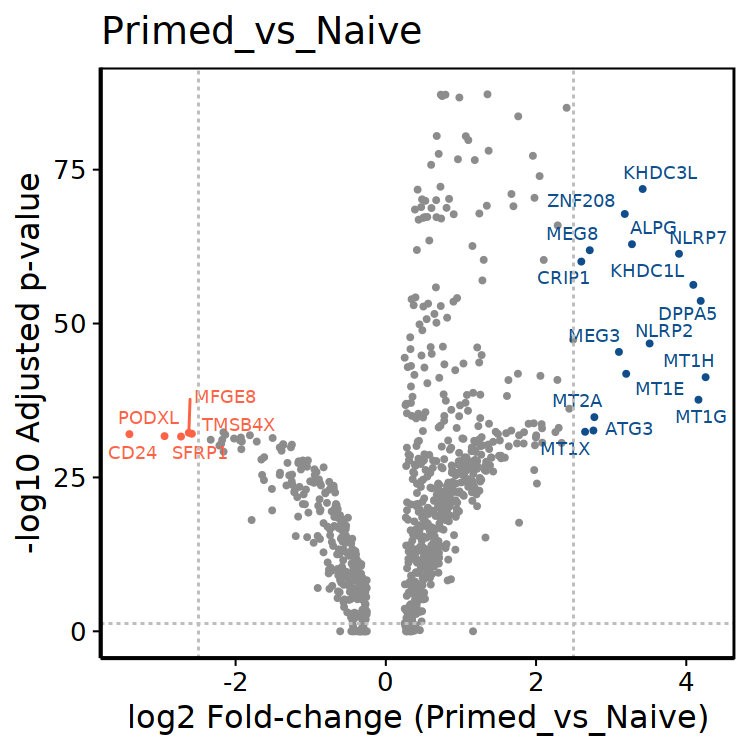

In [30]:
de_genes=readRDS('/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed/so_naive_primed_TSC_VP_DE_genes.rds')
out = de_genes$wilcox
out = out[,c(7,2:6)]
out = out %>% group_by(comparison) %>% arrange(comparison, avg_log2FC)

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'Primed_vs_Naive') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'down',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'up', 'nosig')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (Primed_vs_Naive)') +
ylab('-log10 Adjusted p-value') +
labs(title = "Primed_vs_Naive")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+
geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")

p

In [31]:
pdf("Figures/FigS2B_volcano_Primed_vs_Naive.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 832 rows containing missing values (geom_text_repel).”


png 
  2

Warning message:
“Removed 999 rows containing missing values (geom_text_repel).”


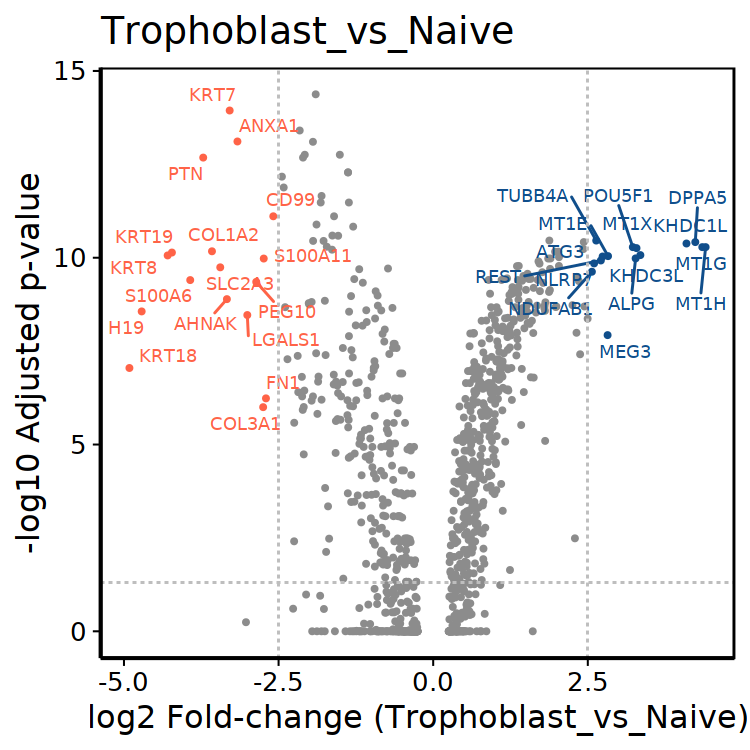

In [33]:

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'Trophoblast_vs_Naive') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'down',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'up', 'nosig')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (Trophoblast_vs_Naive)') +
ylab('-log10 Adjusted p-value') +
labs(title = "Trophoblast_vs_Naive")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+
geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")

p

In [34]:
pdf("Figures/FigS2B_volcano_Trophoblast_vs_Naive.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 999 rows containing missing values (geom_text_repel).”


png 
  2

Warning message:
“Removed 847 rows containing missing values (geom_text_repel).”


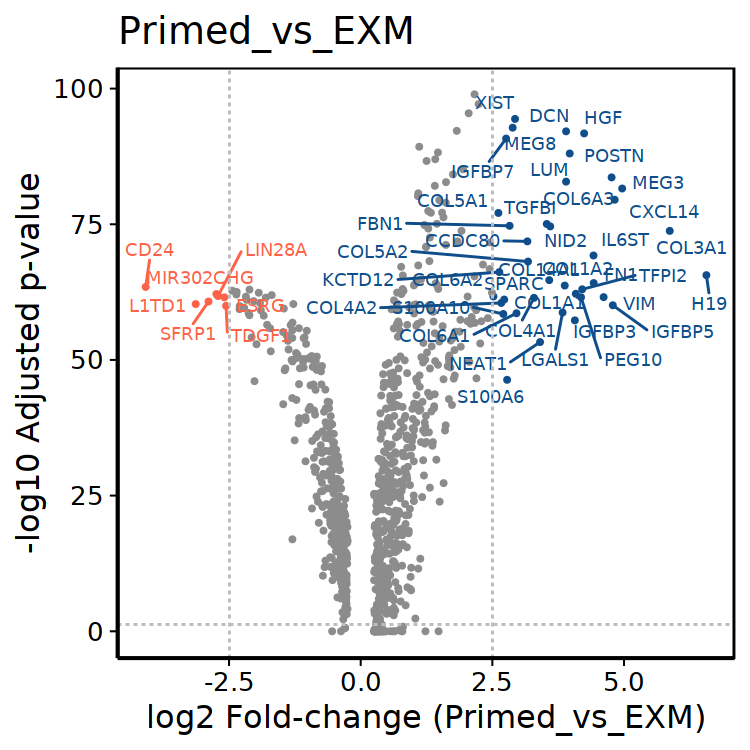

In [35]:

options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'Primed_vs_EXM') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'down',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'up', 'nosig')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (Primed_vs_EXM)') +
ylab('-log10 Adjusted p-value') +
labs(title = "Primed_vs_EXM")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+
geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")

p

In [36]:
pdf("Figures/FigS2B_volcano_Primed_vs_EXM.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 847 rows containing missing values (geom_text_repel).”


png 
  2

Warning message:
“Removed 778 rows containing missing values (geom_text_repel).”


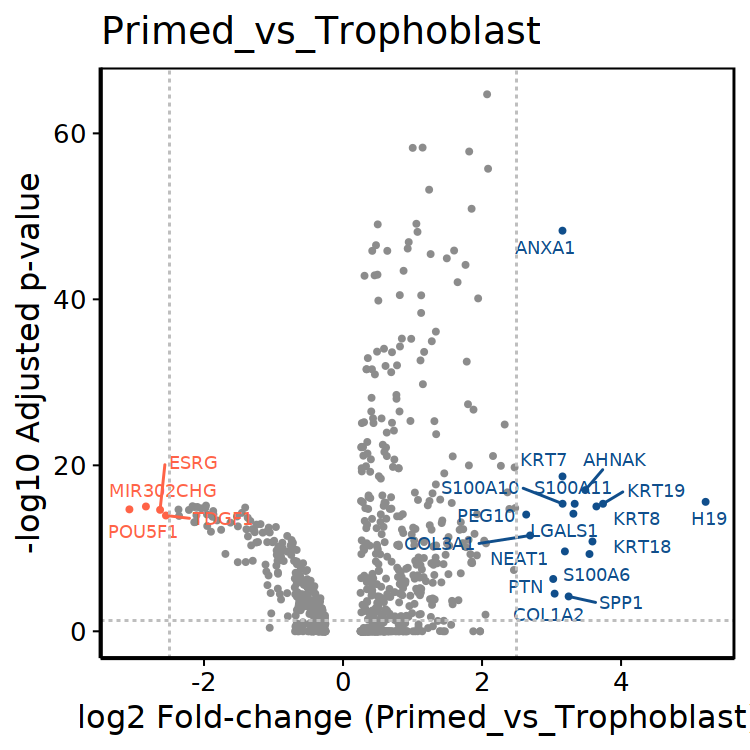

In [37]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'Primed_vs_Trophoblast') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'down',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'up', 'nosig')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (Primed_vs_Trophoblast)') +
ylab('-log10 Adjusted p-value') +
labs(title = "Primed_vs_Trophoblast")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+
geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")

p

In [38]:
pdf("Figures/FigS2B_volcano_Primed_vs_Trophoblast.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 778 rows containing missing values (geom_text_repel).”


png 
  2

Warning message:
“Removed 1101 rows containing missing values (geom_text_repel).”


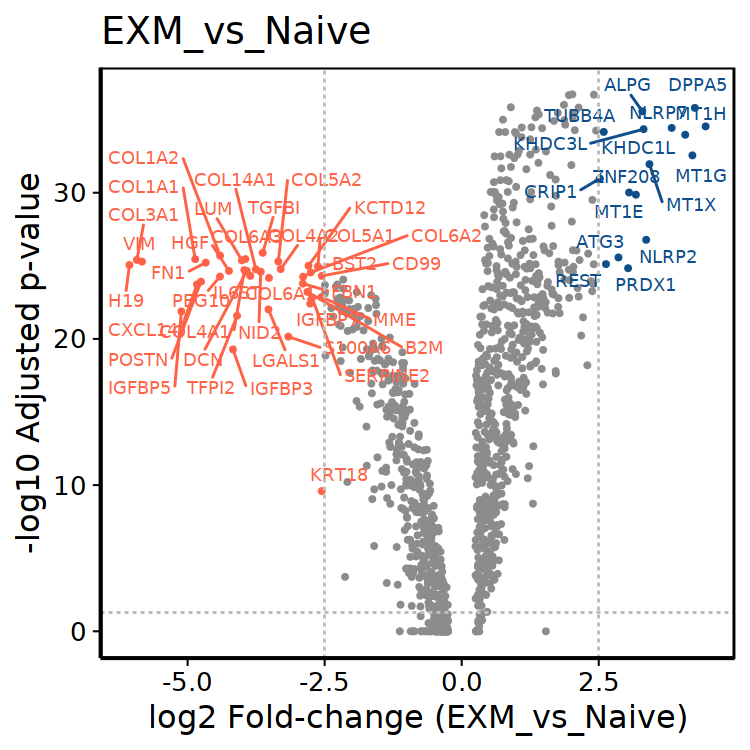

In [39]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'EXM_vs_Naive') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'blue',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'tomato', 'grey30')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (EXM_vs_Naive)') +
ylab('-log10 Adjusted p-value') +
labs(title = "EXM_vs_Naive")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+ 
    geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")
p

In [40]:
pdf("Figures/FigS2B_volcano_EXM_vs_Naive.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 1101 rows containing missing values (geom_text_repel).”


png 
  2

Warning message:
“Removed 828 rows containing missing values (geom_text_repel).”


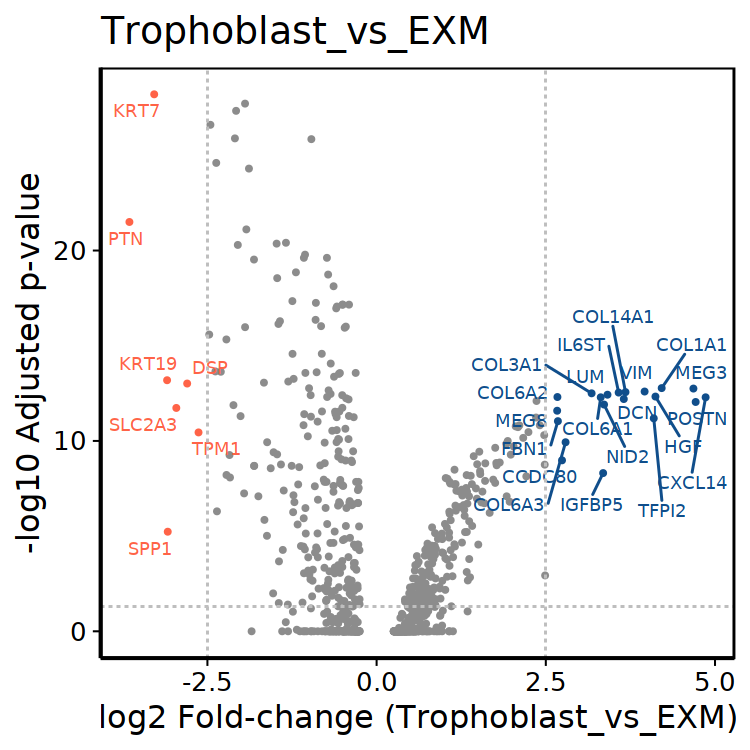

In [41]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 150)

p = out %>% 
filter(comparison == 'Trophoblast_vs_EXM') %>% 
mutate(color = ifelse(avg_log2FC < -2.5 & p_val_adj < 0.05, 'blue',ifelse(avg_log2FC>2.5 & p_val_adj<0.05, 'tomato', 'grey30')),
      labels = ifelse(abs(avg_log2FC) > 2.5 & p_val_adj < 0.05, symbol,NA)) %>%
ggplot(aes(x = -avg_log2FC, y = -log10(p_val_adj), col = color, label = labels)) +
geom_point(size = .8) +
scale_color_manual(values = c('dodgerblue4', 'grey55','tomato')) +
ggrepel::geom_text_repel(max.overlaps = 50, size = 3) +
theme_linedraw(base_size = 15) +
xlab('log2 Fold-change (Trophoblast_vs_EXM)') +
ylab('-log10 Adjusted p-value') +
labs(title = "Trophoblast_vs_EXM")+
theme(legend.position = 'None')+ 
theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black")) + 
 geom_vline(xintercept = 2.5,  linetype="dashed", colour="grey")+
  geom_vline(xintercept = -2.5,  linetype="dashed",  colour="grey")+ 
    geom_hline(yintercept =  -log10(0.05),  linetype="dashed",  colour="grey")
p

In [42]:
pdf("Figures/FigS2B_volcano_trophoblast_vs_EXM.pdf", width = 5, height = 5)
plot(p)
dev.off()

Warning message:
“Removed 828 rows containing missing values (geom_text_repel).”


png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



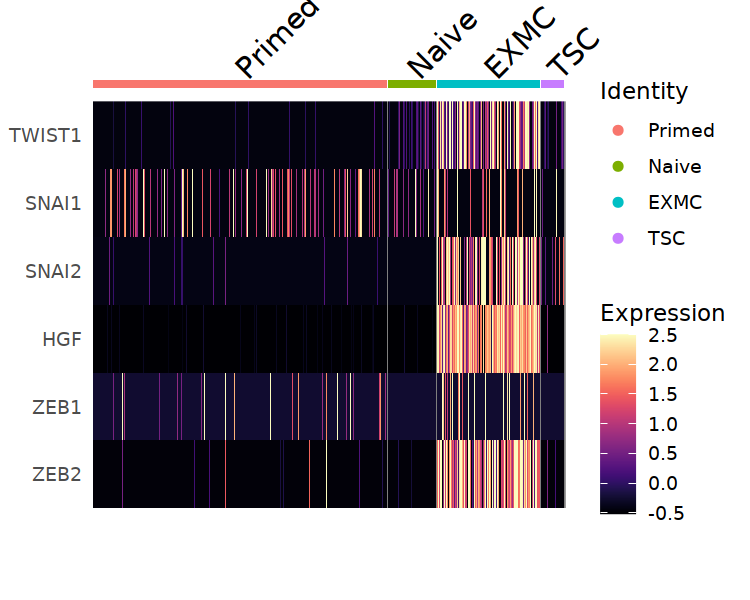

In [44]:
#Fig S2E
options(repr.plot.width=5, repr.plot.height=4)
heatmap_1<- DoHeatmap(so_norm, features = c("TWIST1", "SNAI1", "SNAI2", "HGF","ZEB1", "ZEB2"), size = 5)+ scale_fill_viridis(option = "A")
heatmap_1

In [46]:
pdf("Figures/FigS2EHeatmap_naive_primed_TSC_VP_EMT.pdf", width = 5, height = 4)
plot(heatmap_1)
dev.off()

png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



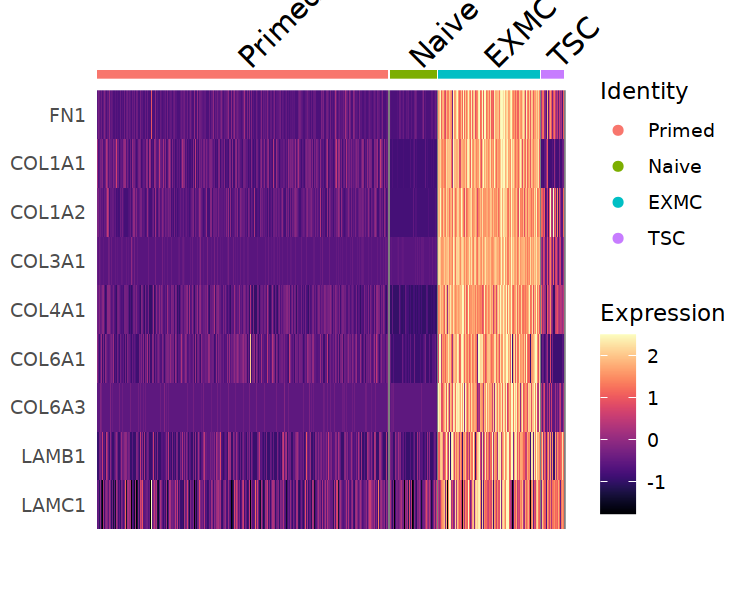

In [47]:
options(repr.plot.width=5, repr.plot.height=4)
heatmap_2<- DoHeatmap(so_norm, features = c("FN1", "COL1A1", "COL1A2", "COL3A1", "COL4A1", "COL6A1", "COL6A3",  "LAMB1", "LAMC1"), size = 5)+ scale_fill_viridis(option = "A")
heatmap_2

In [49]:
pdf("Figures/FigS2G_Heatmap_EXM.pdf", width = 5, height = 4)
plot(heatmap_2)
dev.off()

png 
  2